

# Keras Regression Project 

___

**This project is part of the <a href='https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/#instructor-1'>Python for Data Science and Machine Learning Bootcamp </a> imparted by instructor Jose Portilla.**
___

## Objective

Based off the dataset for different housing features, we're going to try to predict the price that a house should sell at.

## Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hdgn1\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis

In [3]:
#To make sure if we have missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#Uses the describe() method to get a statistical analysis on our data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Create some visualizations

<AxesSubplot:xlabel='price', ylabel='Count'>

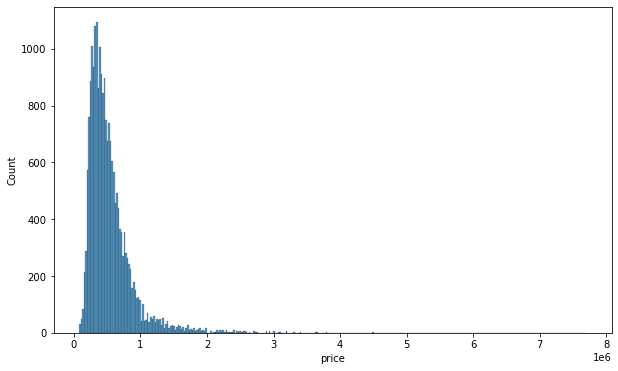

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'])

We can see that most of the houses price is between 0 and 1.5 million dollars. We can also see some outliers that are really expensive houses.

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

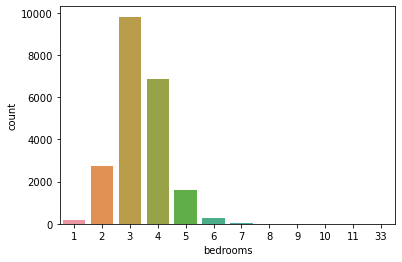

In [6]:
sns.countplot(data=df, x='bedrooms')

Here we can see that most of the houses have between 2 and 5 bedrooms. We can notice that there is one with 33 beedrooms!

In [7]:
df[df['bedrooms']==33]
#sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [8]:
#Get the correleations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [9]:
#Sort the correlations to see those that are highly positive correlated or negatively correlated with price column. 

df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

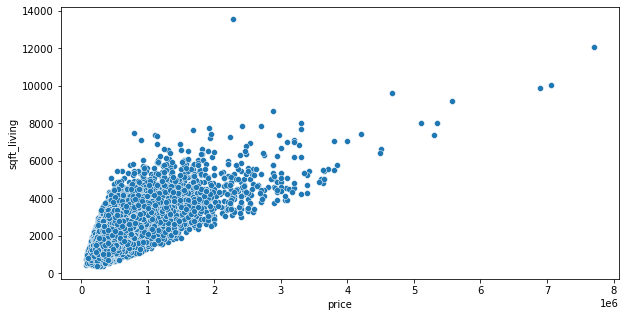

In [10]:
#Since the highest correlation is with sqft_livingn we created a visualization to see how this correlation looks like.
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

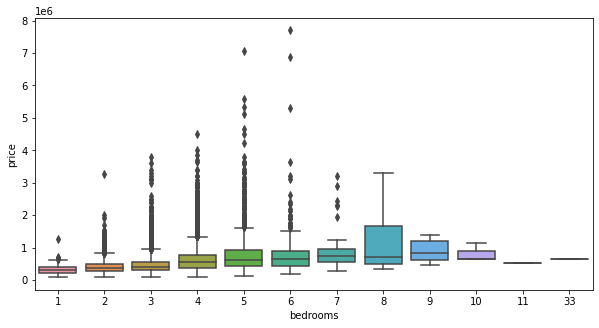

In [11]:
#Create a box plot to see the distribution between bedrooms and price
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df)

We can observe that there's a variation in the houses with bedrooms between 3 and 7 bedrooms.

<AxesSubplot:xlabel='price', ylabel='long'>

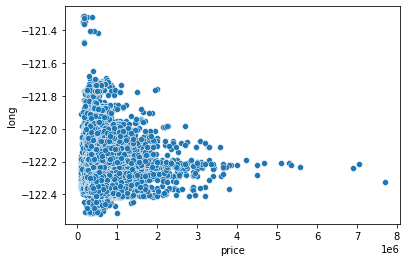

In [12]:
#Create a scatter plot of the longitude
sns.scatterplot(x='price', y='long', data=df)

It seems that the area -122.2 is an expensive area to buy a house.

<AxesSubplot:xlabel='price', ylabel='lat'>

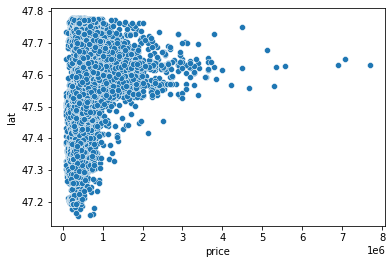

In [13]:
#Create a scatter plot of the latitude
sns.scatterplot(x='price', y='lat', data=df)

In this case we can see that there's a distribution in some latitutes where prices are really high

<AxesSubplot:xlabel='long', ylabel='lat'>

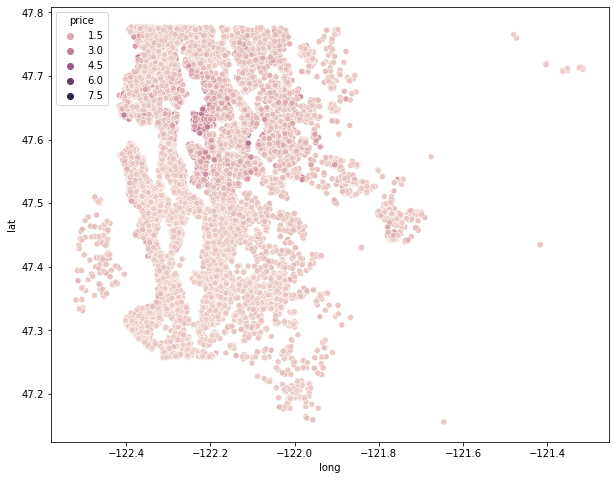

In [14]:
#Create a scatter plot with longitude and latitude to assmilate the map of King County
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

Highlighted in the darker colors we can see where the highest prices are located. This locations are similar to the ones in the scatter plots above. We can also see that the outliers are afecting our plot, so we're going to create a new dataset containing only a percetange of the data and try again this plot.

In [15]:
#Getting the top 20 of the most expensive houses allow us to see that there are only a few houses with a price higher than $3M
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
#Looking at the number of items of the df
len(df)

21597

In [17]:
#Get what the 1% of the data is 
len(df)*0.01

215.97

In [18]:
#Create the new dataset that gets everything after the top 1% of houses, it means starting at index 216.
#We are dropping 1% of the data that contains the outliers.

non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

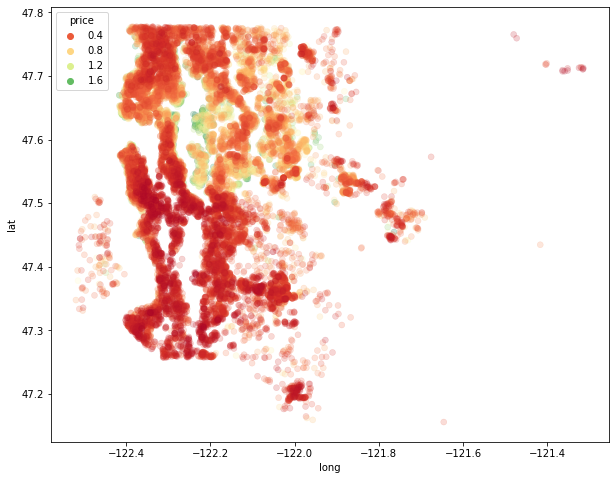

In [19]:
#Create the plot and now we can have a better visualization and see where the most expensives houses are located.
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price',
               edgecolor=None, alpha=0.2, palette='RdYlGn')

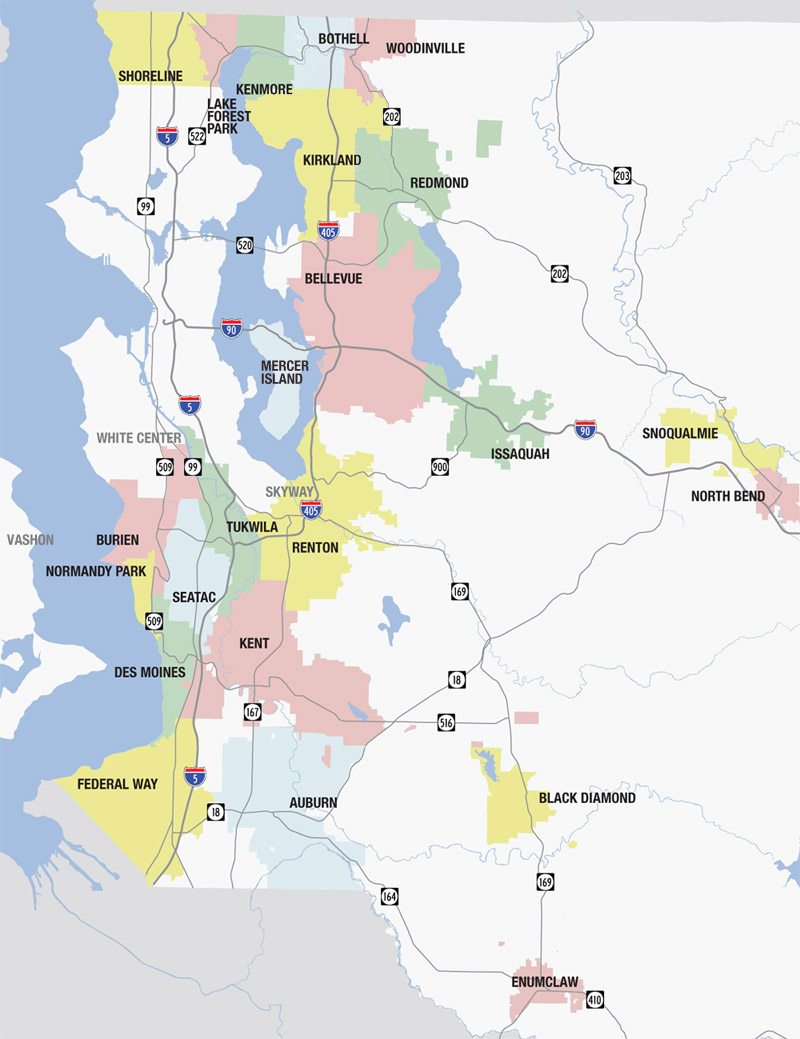

In [20]:
#We can see that the plot above is similar to the map of King County, here is the map to have a better idea of the area.

from IPython.display import Image
Image(filename='king_county_map (1).jpg', height=50, width=400)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

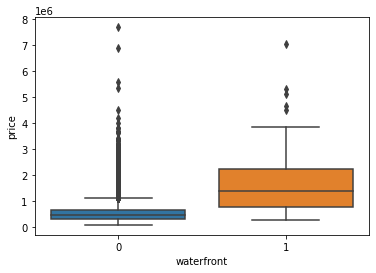

In [21]:
#Create a box plot to see the distribution between waterfront and inland houses.
sns.boxplot(x='waterfront', y='price', data=df)

This visualization allows us to see that houses with waterfront tend to be more expensive than those that are inland.

## Feature engineering process

In [22]:
#Dropping the 'id' column since it's not necessary
df = df.drop('id', axis=1)

In [23]:
df['date'] 

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [24]:
#Column 'date' format is a string, changing it to a datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
#Create 2 new columns one with the month and the other with the date
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

<AxesSubplot:xlabel='month', ylabel='price'>

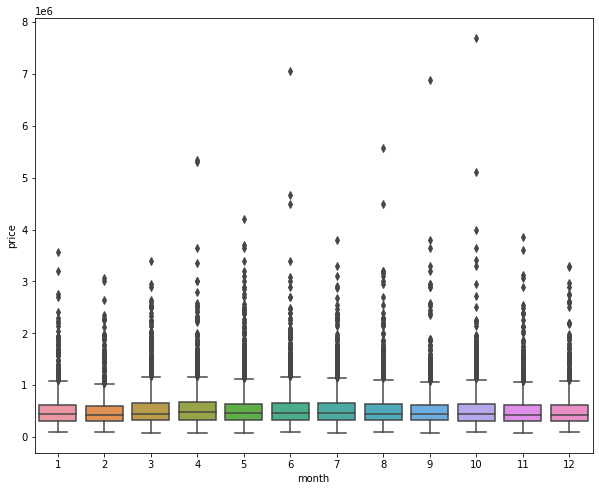

In [26]:
#Now we can create some visualizations to see this columns against the price
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

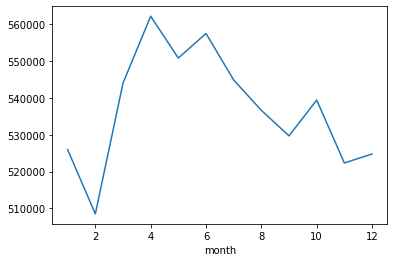

In [27]:
df.groupby('month').mean()['price'].plot()

Here we can notice that there's a different between the months but the Y axis only goes from 510000 to 560000

<AxesSubplot:xlabel='year'>

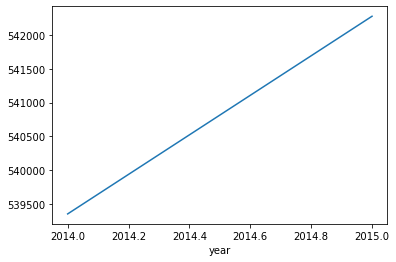

In [28]:
df.groupby('year').mean()['price'].plot()

Upon reviewing the prices over the years, it's evident that prices have consistently risen annually.

In [29]:
#Dropping the date column as it's no longer necessary.
df = df.drop('date', axis=1)

In [30]:
#Dropping 'zipcode' column as it's not going to be useful in this case
df = df.drop('zipcode', axis=1)

In [31]:
#Exploring 'yr_renovated' column
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
#Exploring 'sqft_basement' column
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [33]:
#Separate the features from the label
X = df.drop('price', axis=1).values
y = df['price'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [41]:
X_train.shape

(15117, 19)

### Creating the Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [44]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Training the Model

In [46]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430238924800.0000 - val_loss: 418904997888.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429014810624.0000 - val_loss: 414648107008.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411353317376.0000 - val_loss: 373714649088.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 324290772992.0000 - val_loss: 235680923648.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 166644858880.0000 - val_loss: 106239082496.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 101006483456.0000 - val_loss: 94479450112.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96882376704.0000 - val_loss: 92930523136.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95131230208.0000 - val_loss: 91321401344.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 37578153984.0000 - val_loss: 36368420864.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37418024960.0000 - val_loss: 36207149056.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37263273984.0000 - val_loss: 36042022912.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37111410688.0000 - val_loss: 35886407680.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36937687040.0000 - val_loss: 35783958528.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36848861184.0000 - val_loss: 35584282624.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36677894144.0000 - val_loss: 35496005632.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36510945280.0000 - val_loss: 35295645696.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32958324736.0000 - val_loss: 31521079296.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32889780224.0000 - val_loss: 31463829504.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32846071808.0000 - val_loss: 31409299456.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32809428992.0000 - val_loss: 31378812928.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32781565952.0000 - val_loss: 31330088960.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32745273344.0000 - val_loss: 31326701568.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32712828928.0000 - val_loss: 31367581696.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32707684352.0000 - val_loss: 31199694848.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31447390208.0000 - val_loss: 29680375808.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31429246976.0000 - val_loss: 29671852032.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31426316288.0000 - val_loss: 29608744960.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31414751232.0000 - val_loss: 29633136640.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31381493760.0000 - val_loss: 29652312064.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31364472832.0000 - val_loss: 29584338944.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31349581824.0000 - val_loss: 29585549312.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31339048960.0000 - val_loss: 29557751808.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30622554112.0000 - val_loss: 28664467456.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30687916032.0000 - val_loss: 28638062592.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30601027584.0000 - val_loss: 28606660608.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30623737856.0000 - val_loss: 28613447680.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30612330496.0000 - val_loss: 28684011520.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30622083072.0000 - val_loss: 28580376576.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30573613056.0000 - val_loss: 28654092288.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30559244288.0000 - val_loss: 28578961408.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30096068608.0000 - val_loss: 27956211712.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 30027773952.0000 - val_loss: 28095064064.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 30038845440.0000 - val_loss: 28152246272.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30040031232.0000 - val_loss: 27931181056.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30004074496.0000 - val_loss: 27860264960.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29986889728.0000 - val_loss: 27843717120.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30012655616.0000 - val_loss: 27853715456.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30024577024.0000 - val_loss: 27867668480.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29488076800.0000 - val_loss: 27331614720.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29488943104.0000 - val_loss: 27350872064.0000


<AxesSubplot:>

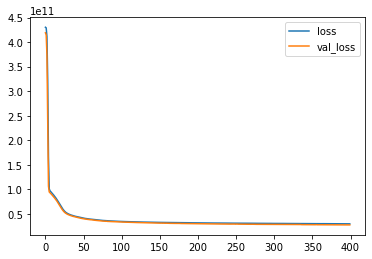

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluation on Test Data

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [53]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [54]:
np.sqrt(mean_squared_error(y_test, predictions))

165380.98115304936

In [55]:
mean_absolute_error(y_test, predictions)

103191.58546790606

In [56]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [57]:
explained_variance_score(y_test, predictions)

0.7942545434382227

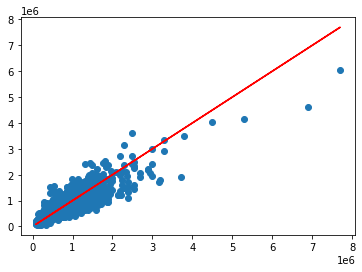

In [59]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') #representation of the perfect prediction line

Our model performed well in predicting house prices within the 0 to $2M range, but some outliers indicate areas where the model's predictions were less accurate.

### Predicting on a brand new house

In [72]:
#We'll use the first house of our data and try to predict its price
single_house = df.drop('price', axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [71]:
#Reshape
single_house = scaler.transform(single_house.values.reshape(-9,19))

In [66]:
#Prediction
model.predict(single_house)

1/1 [==============================] - 0s 23ms/step


array([[288650.5]], dtype=float32)

In [68]:
#Actual price
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


The model forecasted the house sale price at \\$288,650, yet it was sold at \\$221,900. This discrepancy indicates a potential inaccuracy in the model, likely influenced by outliers within our dataset. Retraining the model might improve its accuracy in such cases, ensuring more precise predictions.